In [ ]:
# Install the ultralytics library that contains YOLOv8

!pip install ultralytics

from ultralytics import YOLO

import os

import matplotlib.pyplot as plt

import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a pre-trained YOLOv8 nano model (smallest version for fast training/testing)

model = YOLO("yolov8n.pt")

In [ ]:
# Upload your kaggle.json file to access Kaggle datasets

from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rehabkamel","key":"1af5ef68703b30425928b9010da1d0cd"}'}

In [ ]:
# To download any dataset from Kaggle

# Create a hidden folder called `.kaggle` in the user's home directory

!mkdir -p ~/.kaggle

# Copy the kaggle.json file (API key) into the `.kaggle` folder

!cp kaggle.json ~/.kaggle/

# Change file permissions so only the user can read/write the kaggle.json file

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amitkumargurjar/car-detection-and-tracking-dataset")

print("Path to dataset files:", path)

100%|██████████| 380M/380M [00:02<00:00, 192MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2


In [ ]:
extract_path = path

# Print path and show all files inside the dataset folder

print("Extracted files are located here:", extract_path)

print("Contents:", os.listdir(extract_path))

Extracted files are located here: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2
Contents: ['archive']


In [ ]:
yaml_content = """

train: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/train

val: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/val

nc: 1  # number of classes (1 = car)

names: ['car']

"""

# Create and save the YAML file in your working directory

with open('car_dataset.yaml', 'w') as f:

    f.write(yaml_content)

# Confirm the YAML file was created successfully

print("car_dataset.yaml created successfully.")

print(os.listdir('.'))

car_dataset.yaml created successfully.
['.config', 'car_dataset.yaml', 'kaggle (1).json', 'yolov8n.pt', 'sample_data']


In [ ]:
dataset_yaml = "/content/car_dataset.yaml"

dataset_yaml

'/content/car_dataset.yaml'

In [ ]:
import os

# The dataset was downloaded using kagglehub to 'path'
extract_path = path

# paths to the training and validation folders after using kagglehub to download the dataset
train_data_path = os.path.join(extract_path, "archive", "train")
val_data_path = os.path.join(extract_path, "archive", "val")

# This is the YAML content YOLO uses to locate the images and know how many classes there are
yaml_content = f"""
train: {train_data_path}
val: {val_data_path}
nc: 1
names: ['car']
"""

with open('car_dataset.yaml', 'w') as f:
    f.write(yaml_content)

dataset_yaml = "/content/car_dataset.yaml"


# Using YOLOv8n in the model
model = YOLO("yolov8n.pt")
model.train(data=dataset_yaml, epochs=13, imgsz=640, batch=8, project="car_detection", name="yolov8_car")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=13, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_car2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbe1f2f6b40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/train/images/frame_0000.jpg: 384x640 9 cars, 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


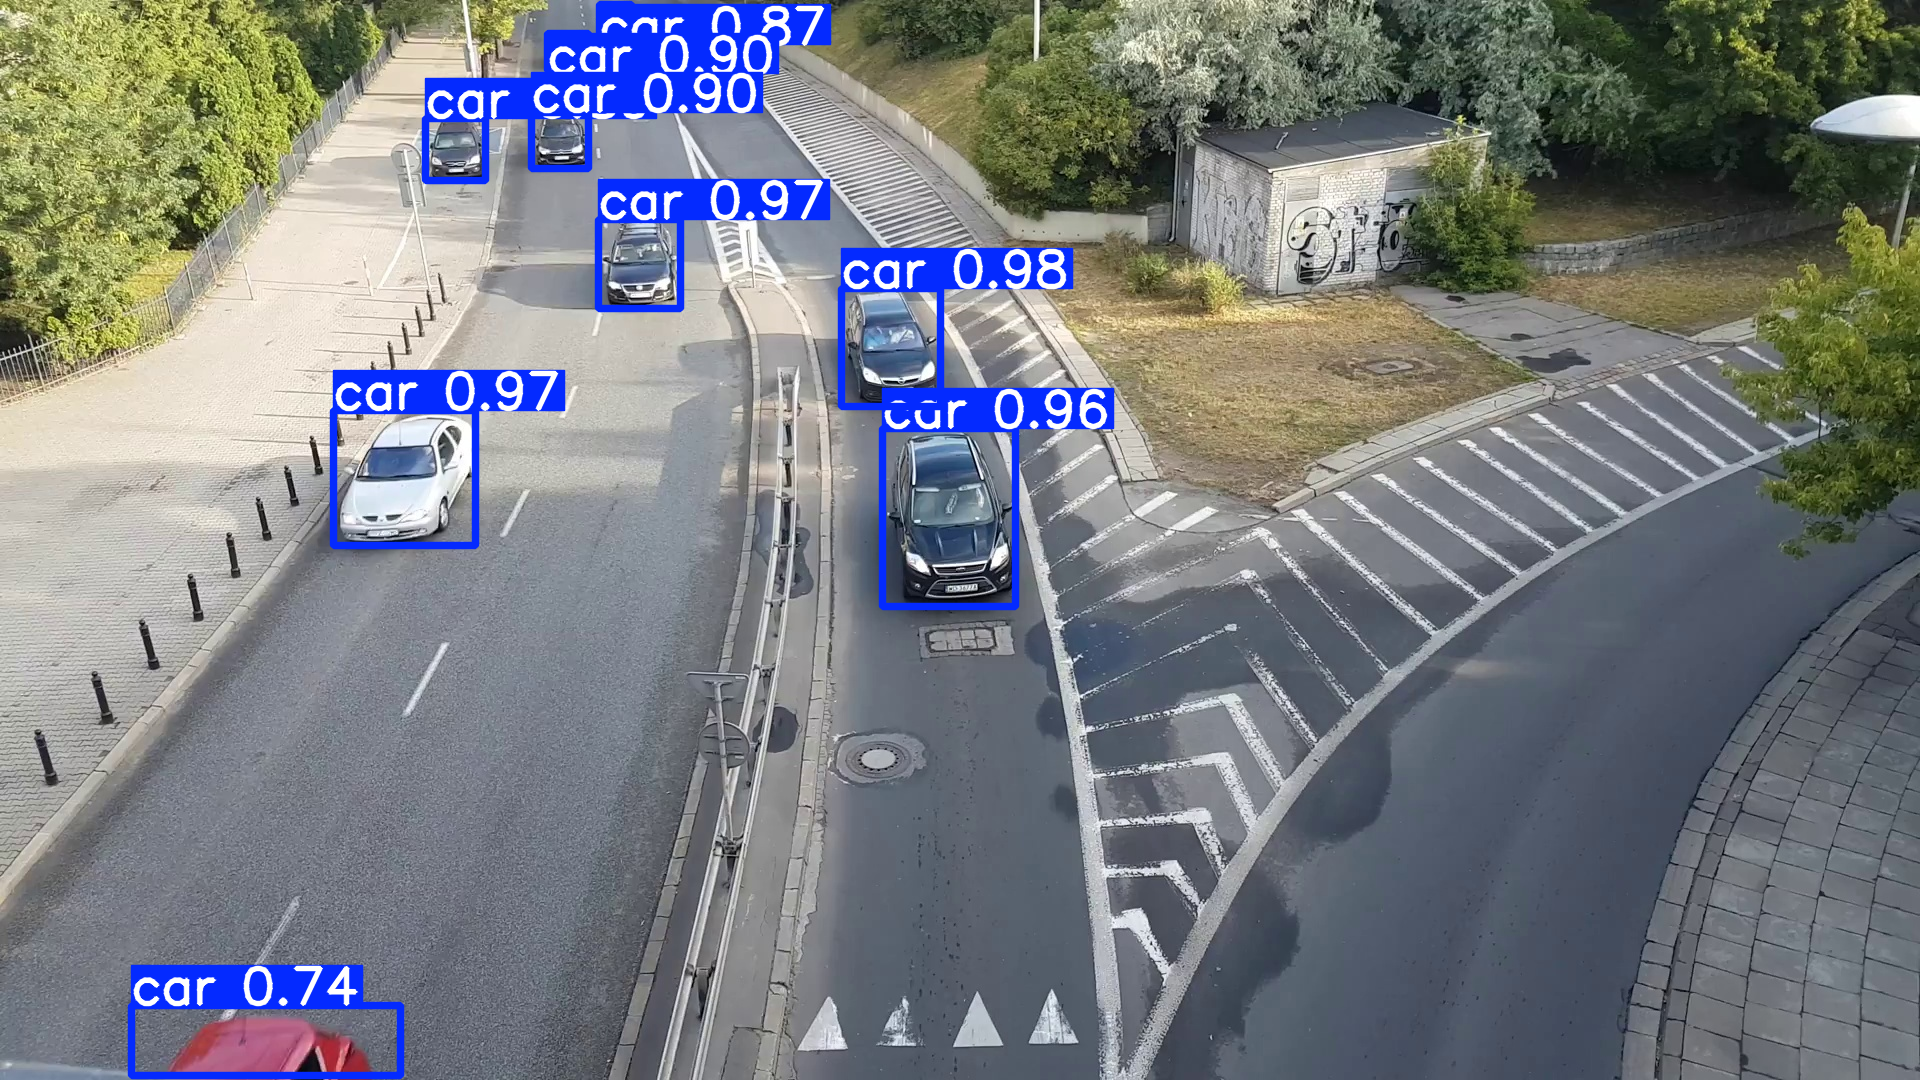

In [18]:
import os

train_img = os.path.join(extract_path, "archive", "train", "images", "frame_0000.jpg")

results = model.predict(train_img, save=True)

if results:

    results[0].show()  # Display the first image with bounding boxes

In [14]:
# Import glob to search for images by file pattern

import glob

test_images = glob.glob("/content/car_detection/yolov8_car3/BoxPR_curve.png")

for img in test_images:

    results = model.predict(img, save=True)

In [15]:
#Evaluate the trained model

results = model.val()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5027.4±1269.1 MB/s, size: 772.1 KB)
val: Scanning /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/val/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 99/99 235.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.0it/s 3.5s
                   all         99        644      0.838      0.793      0.852      0.669
Speed: 5.1ms preprocess, 5.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/runs/detect/val


In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    print('User uploaded file "{name}" with length {length} bytes'.format(

        name=fn, length=len(uploaded[fn])

    ))

test_img = list(uploaded.keys())[0]

Saving WhatsApp Image 2025-11-26 at 10.31.42 PM.jpeg to WhatsApp Image 2025-11-26 at 10.31.42 PM.jpeg
User uploaded file "WhatsApp Image 2025-11-26 at 10.31.42 PM.jpeg" with length 10254 bytes



image 1/1 /content/WhatsApp Image 2025-11-26 at 10.31.42 PM.jpeg: 480x640 10 cars, 41.1ms
Speed: 2.5ms preprocess, 41.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


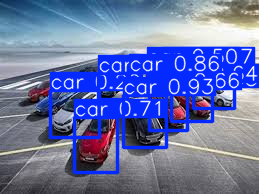

In [17]:
results = model.predict(test_img, save=True)

results[0].show()